# Data Mining Lab wk 5 - Jonathan Pitter 1301057

## First I started with importing all the neccessary models I felt were needed.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
#imports

In [2]:
num_data = pd.read_excel('C:/Users/Phil-Jon-D/Desktop/AY 2017-18/DWDM/Samples/CardiologyNumerical.xls')
cat_data = pd.read_excel('C:/Users/Phil-Jon-D/Desktop/AY 2017-18/DWDM/Samples/CardiologyCategorical.xls')
#separate the data types so algorithm choice will be more streamlined

<p> Next I decided to have a look at how the data was structured to get an understanding of the data presented. </p>

In [3]:
num_data.head(10)

,age,sex,chest pain type,blood_pressure,cholesterol,Fasting blood sugar <120,resting ecg,maximum_heart_rate,angina,peak,slope,#colored vessels,thal,class
0,60,1,4,130,206,0,2,132,1,2.4,2,2,7,0
1,49,1,2,130,266,0,0,171,0,0.6,1,0,3,1
2,64,1,1,110,211,0,2,144,1,1.8,2,0,3,1
3,63,1,4,130,254,0,2,147,0,1.4,2,1,7,0
4,53,1,4,140,203,1,2,155,1,3.1,3,0,7,0
5,58,0,1,150,283,1,2,162,0,1.0,1,0,3,1
6,58,1,2,120,284,0,2,160,0,1.8,2,0,3,0
7,58,1,3,132,224,0,2,173,0,3.2,1,2,7,0
8,63,1,1,145,233,1,2,150,0,2.3,3,0,6,1
9,67,1,4,160,286,0,2,108,1,1.5,2,3,3,0


In [4]:
cat_data.head(10)

,age,sex,chest pain type,blood pressure,cholesterol,Fasting blood sugar <120,resting ecg,maximum heart rate,angina,peak,slope,#colored vessels,thal,class
0,60,Male,Asymptomatic,130,206,False,Hyp,132,True,2.4,Flat,2,Rev,Sick
1,49,Male,Abnormal Angina,130,266,False,Normal,171,False,0.6,Up,0,Normal,Healthy
2,64,Male,Angina,110,211,False,Hyp,144,True,1.8,Flat,0,Normal,Healthy
3,63,Male,Asymptomatic,130,254,False,Hyp,147,False,1.4,Flat,1,Rev,Sick
4,53,Male,Asymptomatic,140,203,True,Hyp,155,True,3.1,Down,0,Rev,Sick
5,58,Female,Angina,150,283,True,Hyp,162,False,1.0,Up,0,Normal,Healthy
6,58,Male,Abnormal Angina,120,284,False,Hyp,160,False,1.8,Flat,0,Normal,Sick
7,58,Male,NoTang,132,224,False,Hyp,173,False,3.2,Up,2,Rev,Sick
8,63,Male,Angina,145,233,True,Hyp,150,False,2.3,Down,0,Fix,Healthy
9,67,Male,Asymptomatic,160,286,False,Hyp,108,True,1.5,Flat,3,Normal,Sick


In [5]:
cat_data.describe()

,age,blood pressure,cholesterol,maximum heart rate,peak,#colored vessels
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.666667
std,9.082101,17.538143,51.830751,22.905161,1.161075,0.933790
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000


In [6]:
num_data.describe()

,age,sex,chest pain type,blood_pressure,cholesterol,Fasting blood sugar <120,resting ecg,maximum_heart_rate,angina,peak,slope,#colored vessels,thal,class
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,3.155116,131.623762,246.264026,0.148515,0.983498,149.646865,0.326733,1.039604,1.600660,0.666667,4.735974,0.544554
std,9.082101,0.466011,0.958941,17.538143,51.830751,0.356198,0.994883,22.905161,0.469794,1.161075,0.616226,0.933790,1.940231,0.498835
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,47.500000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,240.000000,0.000000,0.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,274.500000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


## Something doesn't seem right...

<p>After looking at the table the first two rows of every column has some code that will lead to problems later.
Which means it's probably a good idea to remove them, as such I will.</p>

In [9]:
#confirming that all columns displayed represents all columns in the dataset
cat_data.columns

Index(['age', 'sex', 'chest pain type', 'blood pressure', 'cholesterol',
       'Fasting blood sugar <120', 'resting ecg', 'maximum heart rate',
       'angina', 'peak', 'slope', '#colored vessels', 'thal', 'class'],
      dtype='object')

## <i> Distribution Analysis </i>

<p>After doing some cleaning the next thing was to look at the distribution of the data. </p>

In [10]:
cat_data['class'].value_counts()

Healthy    165
Sick       138
Name: class, dtype: int64

### <i>Looking for pesky outliers and missing data... </i>

<p>Before I started to plot graphs I decided to check for missing data.</p>

In [11]:
cat_data.apply(lambda x: sum(x.isnull()),axis=0)

age                         0
sex                         0
chest pain type             0
blood pressure              0
cholesterol                 0
Fasting blood sugar <120    0
resting ecg                 0
maximum heart rate          0
angina                      0
peak                        0
slope                       0
#colored vessels            0
thal                        0
class                       0
dtype: int64

In [12]:
num_data.apply(lambda x: sum(x.isnull()),axis=0)

age                         0
sex                         0
chest pain type             0
blood pressure              0
cholesterol                 0
Fasting blood sugar <120    0
resting ecg                 0
maximum heart rate          0
angina                      0
peak                        0
slope                       0
#colored vessels            0
thal                        0
class                       0
dtype: int64

<p>Great! no missing data. I could have inferred that from looking at the count when I used .describe() but I wanted to make sure I didn't mess up somewhere :p </p>

<p>Next was looking for outliers.</p>

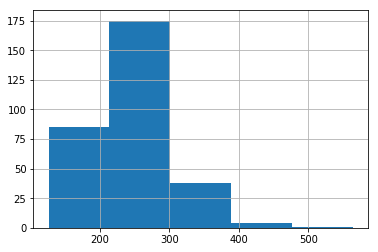

In [49]:
cat_data['cholesterol'].hist(bins=5)

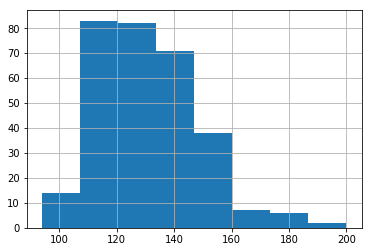

In [59]:
cat_data['blood pressure'].hist(bins=8)

C:\Users\Phil-Jon-D\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


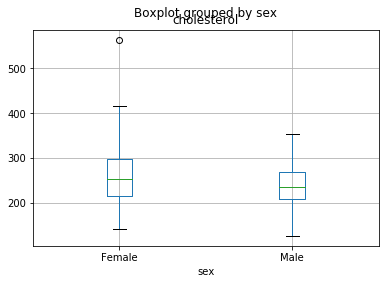

In [14]:
cat_data.boxplot(column='cholesterol', by='sex')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F54A209AC8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001F54A263BE0>], dtype=object)

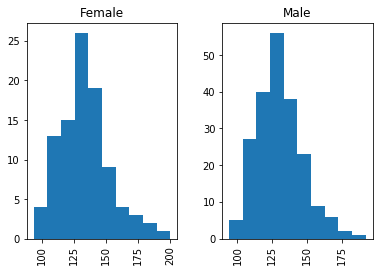

In [15]:
cat_data['blood pressure'].hist(bins=10, by=cat_data['sex'])

C:\Users\Phil-Jon-D\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


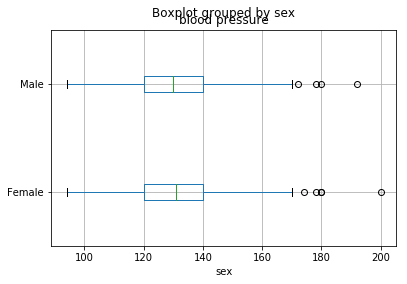

In [16]:
cat_data.boxplot(column='blood pressure', by='sex', vert= False)

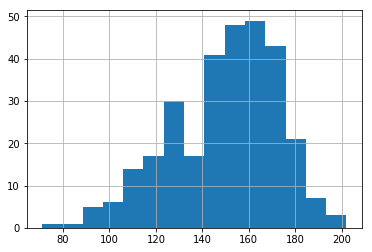

In [17]:
cat_data['maximum heart rate'].hist(bins=15)

## Well, well, well...

<p> After a quick google search the presence of outliers was indicated for 
blood pressure readings for both male and females as well as cholesterol levels for females.</p>

## Chart showing Blood pressure categories

![blood pressure](https://image.prntscr.com/image/EPccXxZtQ0iC3dF_1anHtg.png "Blood Pressure Chart")

## Chart showing Cholesterol categories

![cholesterol chart](https://image.prntscr.com/image/XrB_RpJXQhm3XY0d9_Oy-A.png "Cholesterol Chart")

<p>For bood pressure since it is possible for someone to have that value in an extreme case I didn't move it.</p>

<p> As for Cholesterol... it is possible for someone to have that high of cholesterol levels.</p>

In [32]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['age','sex','chest pain type','blood pressure','cholesterol','Fasting blood sugar <120','maximum heart rate','angina',
          'peak','slope','#colored vessels','thal','class']
le = LabelEncoder()
for i in var_mod:
    cat_data[i] = le.fit_transform(cat_data[i].astype(str))
cat_data.dtypes

age                          int64
sex                          int64
chest pain type              int64
blood pressure               int64
cholesterol                  int64
Fasting blood sugar <120     int64
resting ecg                 object
maximum heart rate           int64
angina                       int64
peak                         int64
slope                        int64
#colored vessels             int64
thal                         int64
class                        int64
dtype: object

In [7]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=10)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 

C:\Users\Phil-Jon-D\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
outcome_var = 'class'
model = LogisticRegression()
predictor_var = ['chest pain type','#colored vessels','thal','peak','maximum_heart_rate']
classification_model(model, num_data,predictor_var,outcome_var)

Accuracy : 84.488%
Cross-Validation Score : 83.129%


In [11]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['age','sex','chest pain type','blood_pressure','cholesterol',
                 'Fasting blood sugar <120','maximum_heart_rate','angina',
          'peak','slope','#colored vessels','thal','class']
classification_model(model, num_data,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 100.000%


In [12]:
#Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)

class                       0.554739
thal                        0.085900
chest pain type             0.062817
#colored vessels            0.056663
maximum_heart_rate          0.055210
peak                        0.046636
age                         0.033475
angina                      0.033379
cholesterol                 0.021767
blood_pressure              0.019227
slope                       0.015927
sex                         0.010600
Fasting blood sugar <120    0.003661
dtype: float64


In [13]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['chest pain type','#colored vessels','thal','peak','maximum_heart_rate']
classification_model(model, num_data,predictor_var,outcome_var)

Accuracy : 86.469%
Cross-Validation Score : 84.817%


In [14]:
model = DecisionTreeClassifier()
predictor_var = ['chest pain type','#colored vessels','thal','peak','maximum_heart_rate']
classification_model(model, num_data,predictor_var,outcome_var)

Accuracy : 99.670%
Cross-Validation Score : 75.548%


In [29]:
model = DecisionTreeClassifier(criterion='entropy')
predictor_var = ['chest pain type','resting ecg','angina','slope','#colored vessels']
classification_model(model, num_data,predictor_var,outcome_var)

Accuracy : 87.459%
Cross-Validation Score : 81.516%


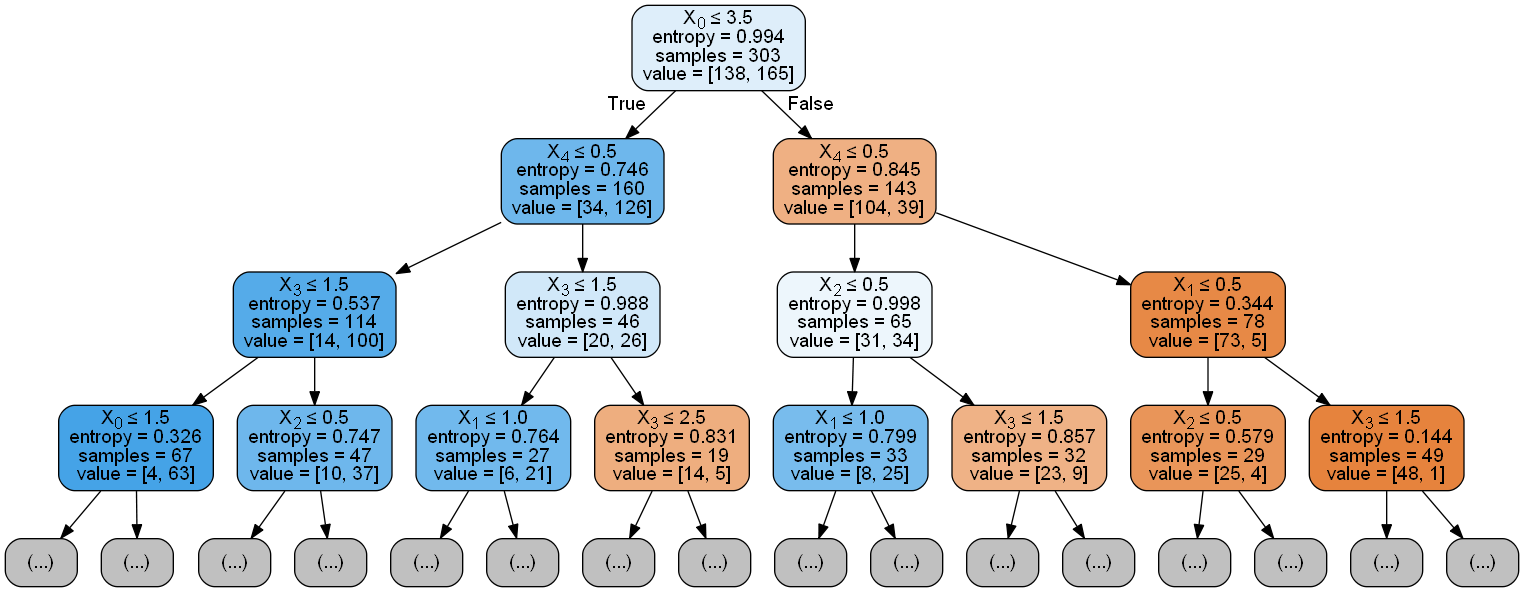

In [31]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/release/bin'
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True,max_depth=3, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())